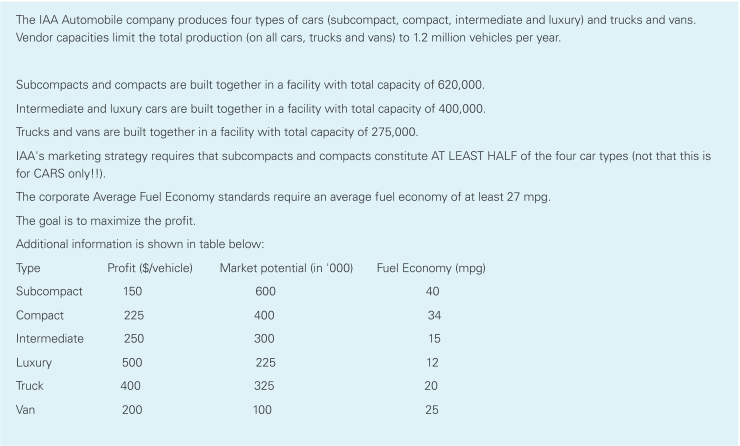

In [1]:
from IPython.display import Image
Image(filename = r"Car Problem.PNG", width=875)

In [2]:
import pandas as pd
from pulp import *

In [5]:
# initialize problem
prob = LpProblem("Vehicle_Manufacturing",LpMaximize)

In [6]:
# Initialize empty variables for how many cars to make
x1 = LpVariable("Subcompact",0)
x2 = LpVariable("Compact",0)
x3 = LpVariable("Intermediate",0)
x4 = LpVariable("Luxury",0)
x5 = LpVariable("Truck",0)
x6 = LpVariable("Van",0)

Objective Function

In [7]:
# Objective Function
prob += 150*x1 + 225*x2 + 250*x3 + 500*x4 + 400*x5 + 200*x6, "Total Profit"

Constraints

In [8]:
# Constraints
prob += x1 + x2 + x3 + x4 + x5 + x6 <= 1200000, "Vendor Constraint"

# Capacity Constraints
prob += x1 + x2 <= 620000, "Subcompact and Compact Capacity"
prob += x3 + x4 <= 400000, " Intermediate and Luxury Capacity"
prob += x5 + x6 <= 275000, "Truck and Van Capacity"

# Market Demand Potential
prob += x1 <= 600000, "S potential"
prob += x2 <= 400000, "C potential"
prob += x3 <= 300000, "I potential"
prob += x4 <= 225000, "L potential"
prob += x5 <= 325000, "T potential"
prob += x6 <= 100000, "V potential"

# Fuel Constraints
# IGNORE

# Subcompact and Compacts Constraint
prob += 0.5*x1 - 0.5*x2 - 0.5*x3 + 0.5*x4 >= 0

Solve and Status

In [9]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


Objective Solve

In [10]:
print("Total Profit = ", value(prob.objective))

Total Profit =  366562500.0


Optimal Values

In [11]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Compact = 287500.0
Intermediate = 175000.0
Luxury = 225000.0
Subcompact = 237500.0
Truck = 275000.0
Van = 0.0


Shadow Prices and Slack

In [12]:
o = [{'name':name, 'shadow price':c.pi, 'slack': c.slack} 
     for name, c in prob.constraints.items()]
print(pd.DataFrame(o))

                                 name  shadow price     slack
0                   Vendor_Constraint         187.5      -0.0
1     Subcompact_and_Compact_Capacity          -0.0   95000.0
2   _Intermediate_and_Luxury_Capacity          25.0      -0.0
3              Truck_and_Van_Capacity         212.5      -0.0
4                         S_potential          -0.0  362500.0
5                         C_potential          -0.0  112500.0
6                         I_potential          -0.0  125000.0
7                         L_potential         325.0      -0.0
8                         T_potential          -0.0   50000.0
9                         V_potential          -0.0  100000.0
10                                _C1         -75.0      -0.0


Complete LP Problem Setup

In [13]:
print(prob)

Vehicle_Manufacturing:
MAXIMIZE
225*Compact + 250*Intermediate + 500*Luxury + 150*Subcompact + 400*Truck + 200*Van + 0
SUBJECT TO
Vendor_Constraint: Compact + Intermediate + Luxury + Subcompact + Truck + Van
 <= 1200000

Subcompact_and_Compact_Capacity: Compact + Subcompact <= 620000

_Intermediate_and_Luxury_Capacity: Intermediate + Luxury <= 400000

Truck_and_Van_Capacity: Truck + Van <= 275000

S_potential: Subcompact <= 600000

C_potential: Compact <= 400000

I_potential: Intermediate <= 300000

L_potential: Luxury <= 225000

T_potential: Truck <= 325000

V_potential: Van <= 100000

_C1: - 0.5 Compact - 0.5 Intermediate + 0.5 Luxury + 0.5 Subcompact >= 0

VARIABLES
Compact Continuous
Intermediate Continuous
Luxury Continuous
Subcompact Continuous
Truck Continuous
Van Continuous

